# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name:Mike Abbinante

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [1]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                            Version
---------------------------------- --------------------
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 2.4.0
anaconda-project                   0.10.2
anyio                              3.5.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        21.3.0
argon2-cffi-bindings               21.2.0
arrow                              1.2.2
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            5.0.4
asttokens                          2.0.5
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.4.0
autopep8                           1.6.0
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

Question 1 Answer:

In [2]:
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"
output_file = "article.pkl"

def extract_article_html(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.text
    else:
        print("Failed to fetch web page.")
        return None

def save_html_to_pkl(html_content, output_file):
    if html_content:
        soup = BeautifulSoup(html_content, "html.parser")
        article = soup.find("article")

        if article:
            with open(output_file, "wb") as file:
                pickle.dump(str(article), file)
            print("Article HTML has been extracted and saved to 'article.pkl'.")
        else:
            print("Article not found on the page.")
    else:
        print("Failed to fetch the web page.")

if __name__ == "__main__":
    article_html = extract_article_html(url)
    save_html_to_pkl(article_html, output_file)

Article HTML has been extracted and saved to 'article.pkl'.


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

Question 2 Answer:

In [3]:
# Read the article HTML from the file
with open("article.pkl", "rb") as file:
    html_content = pickle.load(file)

soup = BeautifulSoup(html_content, "html.parser")
text = soup.get_text()
# removing empty lines for redability purposes
text_without_empty_lines = "\n".join(line for line in text.split("\n") if line.strip())

print(text_without_empty_lines)

How Laser Headlights Work
                130 Comments            
by:
Lewin Day
March 22, 2021
When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!
Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside of a very specific

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

Question 3 Answer:

In [4]:
# Load the spaCy
nlp = spacy.load('en_core_web_sm', disable=["parser", "ner"])

#remove unwanted tokens
def remove_unwanted_tokens(text):
    doc = nlp(text)
    cleaned_tokens = [
        token.text.lower() for token in doc if not token.is_punct and not token.is_space
    ]
    return cleaned_tokens

# Read article from file
with open("article.pkl", "rb") as file:
    html_content = pickle.load(file)

# Parse HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")
article_text = soup.get_text()

# Remove empty lines
text_without_empty_lines = "\n".join(line for line in article_text.split("\n") if line.strip())

# Remove unwanted tokens using spaCy
cleaned_tokens = remove_unwanted_tokens(text_without_empty_lines)

# Find the 5 most frequent tokens
most_common_tokens = Counter(cleaned_tokens).most_common(5)

# Print the most common tokens with their frequencies
print("5 Most Frequent Tokens:")
for token, frequency in most_common_tokens:
    print(f"Token: '{token}', Frequency: {frequency}")

5 Most Frequent Tokens:
Token: 'the', Frequency: 75
Token: 'to', Frequency: 38
Token: 'of', Frequency: 36
Token: 'laser', Frequency: 35
Token: 'in', Frequency: 25


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

Question 4 Answer:

In [5]:

# Load the spaCy
nlp = spacy.load('en_core_web_sm', disable=["parser", "ner"])

# Function to remove unwanted tokens and get lemmas
def get_cleaned_lemmas(text):
    doc = nlp(text)
    cleaned_lemmas = [
        token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space
    ]
    return cleaned_lemmas

# Read the HTML Article
with open("article.pkl", "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML content using BeautifulSoup to extract the text
soup = BeautifulSoup(html_content, "html.parser")
article_text = soup.get_text()

# Remove empty lines
text_without_empty_lines = "\n".join(line for line in article_text.split("\n") if line.strip())

# Remove unwanted tokens and get lemmas
cleaned_lemmas = get_cleaned_lemmas(text_without_empty_lines)

# Find the 5 most frequent lemmas
most_common_lemmas = Counter(cleaned_lemmas).most_common(5)

# Print the most common lemmas with their frequencies
print("5 Most Frequent Lemmas:")
for lemma, frequency in most_common_lemmas:
        print(f"Lemma: '{lemma}', Frequency: {frequency}")

5 Most Frequent Lemmas:
Lemma: 'the', Frequency: 75
Lemma: 'laser', Frequency: 40
Lemma: 'to', Frequency: 38
Lemma: 'of', Frequency: 36
Lemma: 'be', Frequency: 35


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

Question 5 Answer:

In [6]:

# Load the spaCy
nlp = spacy.load('en_core_web_sm', disable=["parser", "ner"])

# Function to remove unwanted tokens and get lemmas
def get_cleaned_lemmas(text):
    doc = nlp(text)
    cleaned_lemmas = [
        token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space
    ]
    return cleaned_lemmas

# Read the HTML Article
with open("article.pkl", "rb") as file:
    html_content = pickle.load(file)

# Get the first sentence
first_sentence = "When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind."

# Remove unwanted tokens and get lemmas
cleaned_tokens = [token.lower() for token in first_sentence.split()]
cleaned_lemmas = get_cleaned_lemmas(first_sentence)

# Find the 5 most frequent tokens and lemmas
most_common_tokens = [token for token, _ in Counter(cleaned_tokens).most_common(5)]
most_common_lemmas = [lemma for lemma, _ in Counter(cleaned_lemmas).most_common(5)]

# Define methods to score sentences
def score_sentence_by_token(sentence, interesting_tokens):
    cleaned_sentence_tokens = [token.lower() for token in sentence.split()]
    interesting_token_count = sum(1 for token in cleaned_sentence_tokens if token in interesting_tokens)
    return interesting_token_count / len(cleaned_sentence_tokens)

def score_sentence_by_lemma(sentence, interesting_lemmas):
    cleaned_sentence_lemmas = get_cleaned_lemmas(sentence)
    interesting_lemma_count = sum(1 for lemma in cleaned_sentence_lemmas if lemma in interesting_lemmas)
    return interesting_lemma_count / len(cleaned_sentence_lemmas)

# Test on the first sentence
score_by_token = score_sentence_by_token(first_sentence, most_common_tokens)
score_by_lemma = score_sentence_by_lemma(first_sentence, most_common_lemmas)

print("Score by Token:", score_by_token)
print("Score by Lemma:", score_by_lemma)

Score by Token: 0.2857142857142857
Score by Lemma: 0.3055555555555556


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Question 6 Answer:

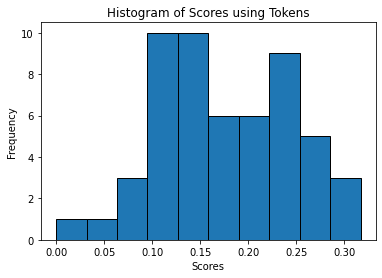

In [7]:

# Load the spaCy
nlp = spacy.load('en_core_web_sm', disable=["parser", "ner"])

# Function to remove unwanted tokens
def remove_unwanted_tokens(text):
    doc = nlp(text)
    cleaned_tokens = [
        token.text.lower() for token in doc if not token.is_punct and not token.is_space
    ]
    return cleaned_tokens

# Function to score a sentence based on the frequency of interesting tokens
def score_sentence_by_token(sentence, interesting_tokens):
    cleaned_sentence_tokens = [token.lower() for token in sentence.split()]
    interesting_token_count = sum(1 for token in cleaned_sentence_tokens if token in interesting_tokens)
    return interesting_token_count / len(cleaned_sentence_tokens)

# Read the article HTML from the file
with open("article.pkl", "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")
article_text = soup.get_text()

# Remove empty lines 
text_without_empty_lines = "\n".join(line for line in article_text.split("\n") if line.strip())

# Remove unwanted tokens using spaCy
cleaned_tokens = remove_unwanted_tokens(text_without_empty_lines)

# Find the 5 most frequent tokens
most_common_tokens = [token for token, _ in Counter(cleaned_tokens).most_common(5)]

# Get sentences from the article
sentences = [sentence.strip() for sentence in text_without_empty_lines.split('.') if sentence.strip()]

# Calculate the scores for each sentence
scores_by_token = [score_sentence_by_token(sentence, most_common_tokens) for sentence in sentences]

# Plot a histogram
plt.hist(scores_by_token, bins=10, edgecolor='black')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Histogram of Scores using Tokens')
plt.show()

#Answer: The most common scores are between approximately 0.09 and 0.16

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Question 7 Answer:

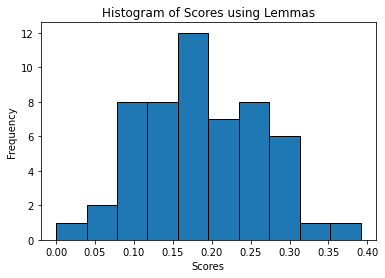

In [8]:

# Load the spaCy
nlp = spacy.load('en_core_web_sm', disable=["parser", "ner"])

# Function to remove unwanted tokens and get lemmas
def get_cleaned_lemmas(text):
    doc = nlp(text)
    cleaned_lemmas = [
        token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space
    ]
    return cleaned_lemmas

# Function to score a sentence based on the frequency of interesting lemmas
def score_sentence_by_lemma(sentence, interesting_lemmas):
    cleaned_sentence_lemmas = get_cleaned_lemmas(sentence)
    interesting_lemma_count = sum(1 for lemma in cleaned_sentence_lemmas if lemma in interesting_lemmas)
    return interesting_lemma_count / len(cleaned_sentence_lemmas)

# Read the article HTML from the file
with open("article.pkl", "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML content using BeautifulSoup to extract the text
soup = BeautifulSoup(html_content, "html.parser")
article_text = soup.get_text()

# Remove empty lines for better readability
text_without_empty_lines = "\n".join(line for line in article_text.split("\n") if line.strip())

# Remove unwanted tokens and get lemmas using spaCy
cleaned_lemmas = get_cleaned_lemmas(text_without_empty_lines)

# Find the 5 most frequent lemmas
most_common_lemmas = [lemma for lemma, _ in Counter(cleaned_lemmas).most_common(5)]

# Get sentences from the article
sentences = [sentence.strip() for sentence in text_without_empty_lines.split('.') if sentence.strip()]

# Calculate the scores for each sentence
scores_by_lemma = [score_sentence_by_lemma(sentence, most_common_lemmas) for sentence in sentences]

# Plot a histogram
plt.hist(scores_by_lemma, bins=10, edgecolor='black')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Histogram of Scores using Lemmas')
plt.show()
#Answer: The most common scores are between approximately 0.16 and 0.19

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

Question 8 Answer:

I would put for it to only look at things with the noun tag. This would change it so a lot of the less interesting things such as prepositions and verbs from the resulting lists. There was a lot of prepositions or just incredibly common words used that may not be that interesting to what we want to know. There would probably be more uniqueness seen compared to other articles.